In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Importing the dataset 

df = pd.read_csv('spam.csv',  encoding = "ISO-8859-1")

In [3]:
## Checking the dataset

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Step 1 . Data Cleaning 

In [5]:
### Dropping the column which have low values 

In [6]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1 , inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
### Renaming the columns 

df.rename(columns = {"v1" :"Target", "v2":"Text"}, inplace = True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [11]:
df["Target"] = le.fit_transform(df["Target"])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
### Checking missing values 

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
### Checking duplicated values 

df.duplicated().sum()

403

In [15]:
### Dropping duplicated values 

df = df.drop_duplicates(keep = "first")

In [16]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.shape

(5169, 2)

## Step 2 . Exploratory Data Analysis (EDA)

In [18]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [19]:
### Checking target variables with the help of graph 

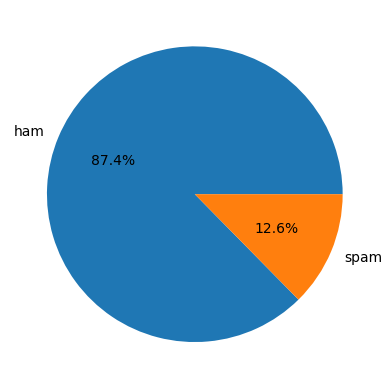

In [20]:
plt.pie(df["Target"].value_counts(), labels=["ham","spam"], autopct='%1.1f%%')
plt.show() 

In [21]:
### Importing NLTK

import nltk

In [22]:
### Counting Number of character 

df["num_char"] = df["Text"].apply(len)

In [23]:
df.head()

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
### Counting Number of words 

df["num_words"] = df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,Target,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
### Checking the sentences of Text 

df["num_sent"] = df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,Target,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.columns

Index(['Target', 'Text', 'num_char', 'num_words', 'num_sent'], dtype='object')

In [30]:
### Checking the description of the dataframe apart from target variable

df[['Text', 'num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


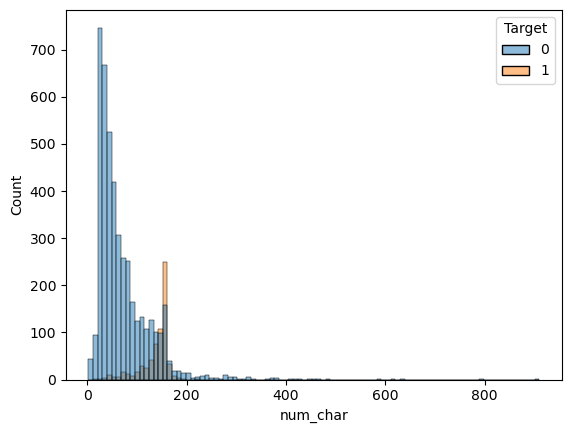

In [31]:
### Plotting a graph to check the spam & ham values in a dataframe 

sns.histplot(data=df, x="num_char", hue="Target", kde=False)
plt.show()

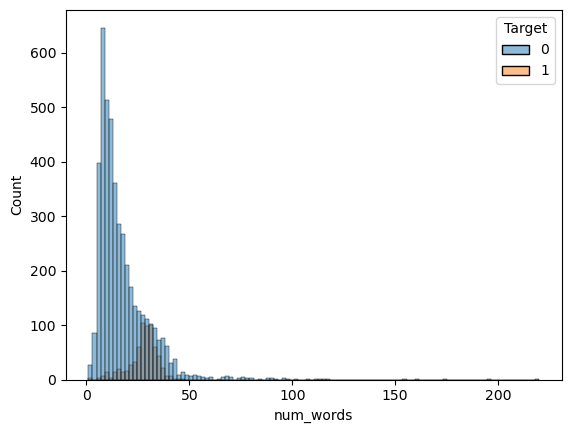

In [32]:
sns.histplot(data=df, x="num_words", hue="Target", kde=False)
plt.show()

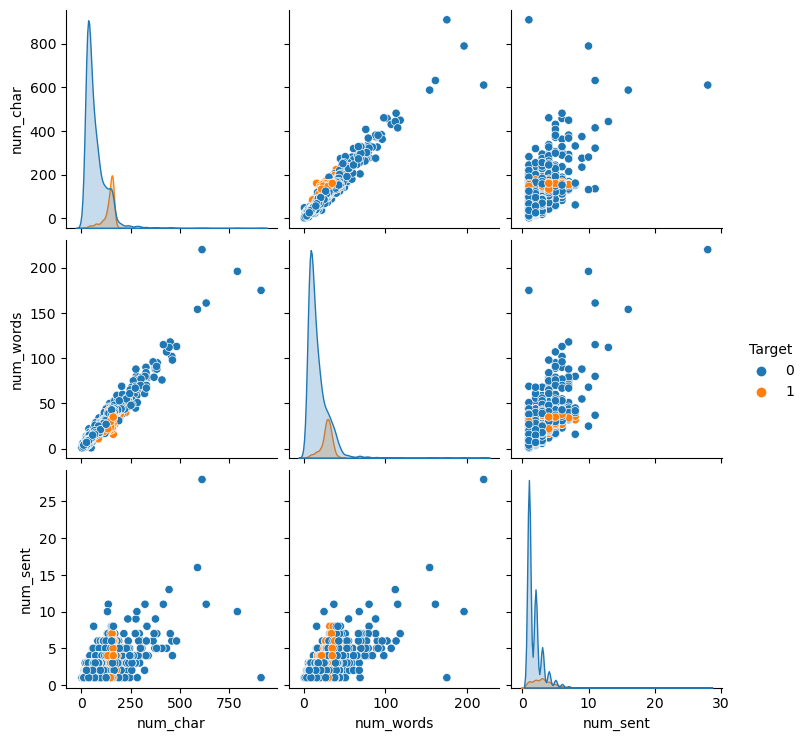

In [33]:
sns.pairplot(hue="Target", data = df)
plt.show()

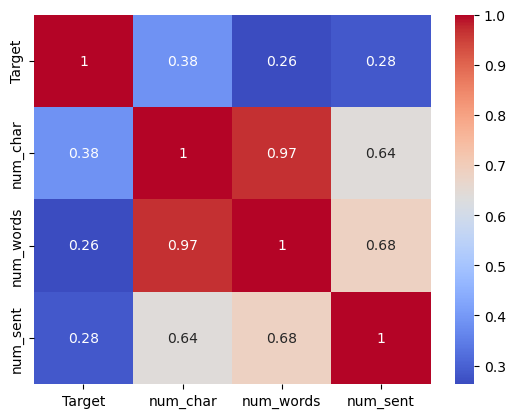

In [34]:
### Checking the correlation between the data 

sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")
plt.show()

## Step 3 . Data Preprocessing or Text PreProcessing 

In [35]:
### Stpes involve in text pre processing 
##1. Lower Case 
##2. Tokenization 
##3. Removing special character 
##4. Removing Punctuation or Stop Words 
##5. Stemming 

In [36]:
### Importing Required Libraries for text pre processing 

import string
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

In [37]:
### Dealing with stop words and Applying Lemmatization 
 
stopwords = nltk.corpus.stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [38]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
### Text Preprocessing 

def text_preprocessing(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    clean_text = " ".join(tokens)
    return clean_text

In [40]:
df["processed_text"] = df["Text"].apply(text_preprocessing)

In [41]:
df.head()

,Target,Text,num_char,num_words,num_sent,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he go to usf he life around her...


In [42]:
! pip install wordcloud

In [43]:
### Using WordCloud and checking all common text in Spam messeges 

from wordcloud import WordCloud
wc = WordCloud()

In [44]:
spam = wc.generate(df[df["Target"] ==1]["processed_text"].str.cat(sep= "  "))

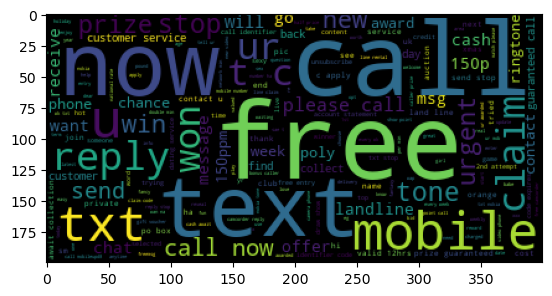

In [45]:
plt.imshow(spam)
plt.show()

In [46]:
### Now Checking for Real Text or Ham messeges 

ham = wc.generate(df[df["Target"] ==0]["processed_text"].str.cat(sep= "  "))

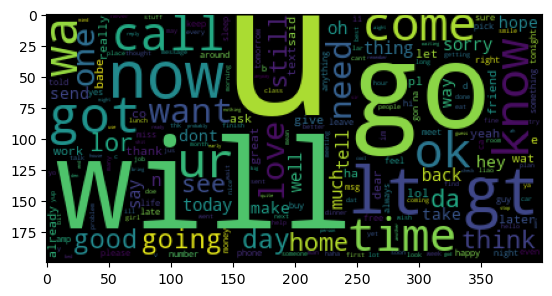

In [47]:
plt.imshow(ham)
plt.show()

In [48]:
### Checking the most commonn word that occour in spam and ham messeges 

grouped = df.groupby("Target")
spam_df = grouped.get_group(0)
ham_df = grouped.get_group(1)

In [49]:
print(spam_df.shape)
print(ham_df.shape)

(4516, 6)
(653, 6)


## Step 4. Model Building 

In [50]:
### Using Navie Bayes Importing required libraries 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [51]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [52]:
X = tfidf.fit_transform(df["processed_text"]).toarray()

In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
X.shape

(5169, 4000)

In [55]:
y = df["Target"].values

In [56]:
y.shape

(5169,)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
# Checking the shape of the training and test sets

print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (3463, 4000)
Shape of the training output data: (3463,)
Shape of the test input data: (1706, 4000)
Shape of the test output data: (1706,)


In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [61]:
gnb = GaussianNB()
mub =  MultinomialNB()
bub = BernoulliNB()

In [62]:
### Using Gaussian Naive bayes

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [63]:
accuracy1 = accuracy_score(y_test,y_pred1)
accuracy1

0.8939038686987104

In [64]:
confusion1 = confusion_matrix(y_test,y_pred1)
confusion1

array([[1332,  140],
       [  41,  193]], dtype=int64)

In [65]:
precision1 = precision_score(y_test,y_pred1)
precision1

0.5795795795795796

In [66]:
### Using Multinomial Navie Bayes 

mub.fit(X_train, y_train)
y_pred2 = mub.predict(X_test)
accuracy2 = accuracy_score(y_test,y_pred2)
print(accuracy2)
confusion2 = confusion_matrix(y_test,y_pred2)
print(confusion2)
precision2 = precision_score(y_test,y_pred2)
print(precision2)

0.9577960140679953
[[1471    1]
 [  71  163]]
0.9939024390243902


In [67]:
### Using Burnoli  Navie Bayes 

bub.fit(X_train, y_train)
y_pred3 = bub.predict(X_test)
accuracy3 = accuracy_score(y_test,y_pred3)
print(accuracy3)
confusion3 = confusion_matrix(y_test,y_pred3)
print(confusion2)
precision3 = precision_score(y_test,y_pred3)
print(precision3)

0.9747948417350527
[[1471    1]
 [  71  163]]
0.9658536585365853


### taking Multinomial Naive Bayes Because getting higest precision and accuracy is good 

## Creating a Data Piple line to move to the weebsite

In [68]:
### Importing required libraries 

import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mub,open("model.pkl","wb"))